In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_parquet("../data/Electric_Vehicle_Population_Data_cleaned.parquet")


In [3]:
features = df[['Model Year', 'Electric Range', 'Electric Vehicle Type', 'Make']]

# One-Hot-Encoding
encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(features[['Electric Vehicle Type', 'Make']])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(['Electric Vehicle Type', 'Make']))

# Kombinieren mit numerischen Features
numerical_df = features[['Model Year', 'Electric Range']].reset_index(drop=True)
combined_df = pd.concat([numerical_df, categorical_df], axis=1)

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

C:\Users\arons\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\arons\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\arons\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arons\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\arons\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

In [7]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

C:\Users\arons\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


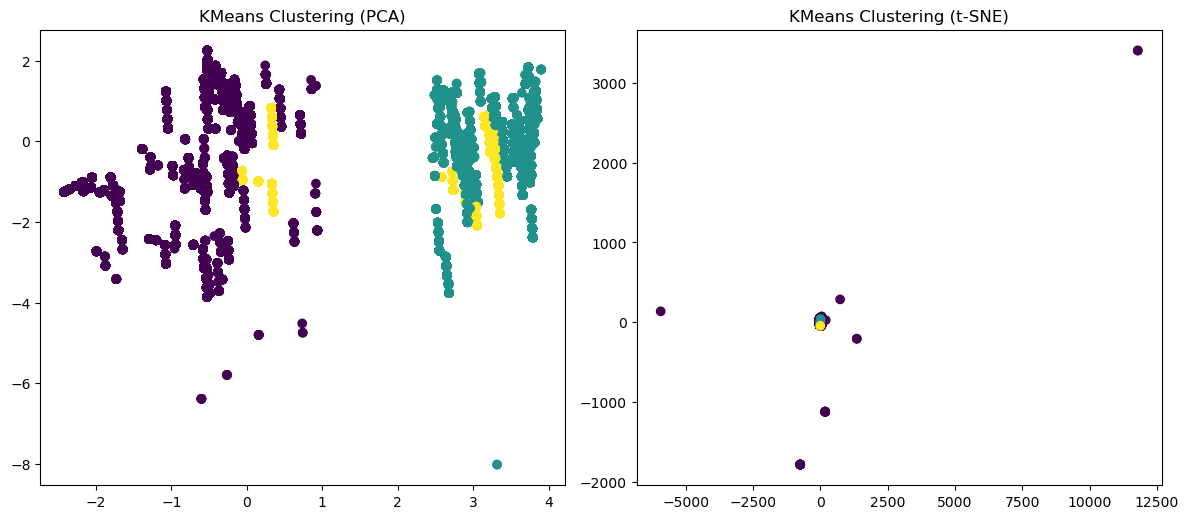

In [8]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.title("KMeans Clustering (PCA)")

plt.subplot(2, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels)
plt.title("KMeans Clustering (t-SNE)")


plt.tight_layout()
plt.show()
